<a href="https://colab.research.google.com/github/amitverma7426/DataScience/blob/main/Final_Project_House_Sales_in_King_County%2C_USA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn



In [2]:
!pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 32.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [4]:
filepath='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
df = pd.read_csv(filepath, header=None)

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,NaN,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,0.0,7129300520,20141013T000000,221900.0,3.0,1.0,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
2,1.0,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.721000000000004,-122.319,1690,7639
3,2.0,5631500400,20150225T000000,180000.0,2.0,1.0,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.23299999999999,2720,8062
4,3.0,2487200875,20141209T000000,604000.0,4.0,3.0,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.39299999999999,1360,5000


In [6]:
df.dtypes

0     float64
1      object
2      object
3      object
4      object
5      object
6      object
7      object
8      object
9      object
10     object
11     object
12     object
13     object
14     object
15     object
16     object
17     object
18     object
19     object
20     object
21     object
dtype: object

In [7]:
df.dropna(subset=[1], axis=1, inplace=True)

In [8]:
column_data_types = df.dtypes
print(column_data_types)


0     float64
1      object
2      object
3      object
4      object
5      object
6      object
7      object
8      object
9      object
10     object
11     object
12     object
13     object
14     object
15     object
16     object
17     object
18     object
19     object
20     object
21     object
dtype: object


In [9]:
df.describe()

,0
count,21613.00000
mean,10806.00000
std,6239.28002
min,0.00000
25%,5403.00000
50%,10806.00000
75%,16209.00000
max,21612.00000


In [10]:
df

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,NaN,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,0.0,7129300520,20141013T000000,221900.0,3.0,1.0,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
2,1.0,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.721000000000004,-122.319,1690,7639
3,2.0,5631500400,20150225T000000,180000.0,2.0,1.0,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.23299999999999,2720,8062
4,3.0,2487200875,20141209T000000,604000.0,4.0,3.0,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.39299999999999,1360,5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21609,21608.0,263000018,20140521T000000,360000.0,3.0,2.5,1530,1131,3.0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21610,21609.0,6600060120,20150223T000000,400000.0,4.0,2.5,2310,5813,2.0,0,...,8,2310,0,2014,0,98146,47.5107,-122.36200000000001,1830,7200
21611,21610.0,1523300141,20140623T000000,402101.0,2.0,0.75,1020,1350,2.0,0,...,7,1020,0,2009,0,98144,47.5944,-122.29899999999999,1020,2007
21612,21611.0,291310100,20150116T000000,400000.0,3.0,2.5,1600,2388,2.0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [11]:
df

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,NaN,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,0.0,7129300520,20141013T000000,221900.0,3.0,1.0,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
2,1.0,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.721000000000004,-122.319,1690,7639
3,2.0,5631500400,20150225T000000,180000.0,2.0,1.0,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.23299999999999,2720,8062
4,3.0,2487200875,20141209T000000,604000.0,4.0,3.0,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.39299999999999,1360,5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21609,21608.0,263000018,20140521T000000,360000.0,3.0,2.5,1530,1131,3.0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21610,21609.0,6600060120,20150223T000000,400000.0,4.0,2.5,2310,5813,2.0,0,...,8,2310,0,2014,0,98146,47.5107,-122.36200000000001,1830,7200
21611,21610.0,1523300141,20140623T000000,402101.0,2.0,0.75,1020,1350,2.0,0,...,7,1020,0,2009,0,98144,47.5944,-122.29899999999999,1020,2007
21612,21611.0,291310100,20150116T000000,400000.0,3.0,2.5,1600,2388,2.0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [12]:
# Assuming your DataFrame is named df
df.drop(columns=[1], inplace=True)
df

,0,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
0,NaN,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,0.0,20141013T000000,221900.0,3.0,1.0,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
2,1.0,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.721000000000004,-122.319,1690,7639
3,2.0,20150225T000000,180000.0,2.0,1.0,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.23299999999999,2720,8062
4,3.0,20141209T000000,604000.0,4.0,3.0,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.39299999999999,1360,5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21609,21608.0,20140521T000000,360000.0,3.0,2.5,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21610,21609.0,20150223T000000,400000.0,4.0,2.5,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.36200000000001,1830,7200
21611,21610.0,20140623T000000,402101.0,2.0,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.29899999999999,1020,2007
21612,21611.0,20150116T000000,400000.0,3.0,2.5,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [13]:
df.describe()

,0
count,21613.00000
mean,10806.00000
std,6239.28002
min,0.00000
25%,5403.00000
50%,10806.00000
75%,16209.00000
max,21612.00000


In [14]:
print("number of NaN values for the column bedrooms :", df[4].isnull().sum())
print("number of NaN values for the column bathrooms :", df[5].isnull().sum())


number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


In [15]:
df[4].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
21609    False
21610    False
21611    False
21612    False
21613    False
Name: 4, Length: 21614, dtype: bool

In [17]:
mean=df[4].astype().mean()
df[4].replace(np.nan,mean, inplace=True)

TypeError: NDFrame.astype() missing 1 required positional argument: 'dtype'

In [18]:
df.value_counts()

0        2                3         4    5     6     7      8    9  10  11  12  13    14    15    16  17     18                 19                   20    21   
0.0      20141013T000000  221900.0  3.0  1.0   1180  5650   1.0  0  0   3   7   1180  0     1955  0   98178  47.5112            -122.257             1340  5650     1
14409.0  20140613T000000  513000.0  4.0  2.75  2020  7070   1.0  0  0   5   7   1010  1010  1958  0   98126  47.5202            -122.37799999999999  1390  6000     1
14417.0  20141025T000000  390000.0  3.0  2.5   1610  10292  1.0  0  0   4   7   1190  420   1969  0   98056  47.5349            -122.17399999999999  1940  8700     1
14416.0  20150430T000000  510000.0  3.0  2.5   1830  8133   1.0  0  0   3   8   1390  440   1996  0   98028  47.7478            -122.24700000000001  2310  11522    1
14415.0  20150505T000000  700180.0  2.0  1.75  1530  4387   1.0  0  0   3   8   1020  510   1952  0   98115  47.6726            -122.264             1870  5029     1
         

In [19]:
# Assuming your DataFrame is named df and the column containing floor values is named 'floor'
df.value_counts(8)

8
1.0       10680
2.0        8241
1.5        1910
3.0         613
2.5         161
3.5           8
floors        1
Name: count, dtype: int64

In [20]:
df.value_counts(8).to_frame()

,count
8,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8
floors,1


In [21]:
rows = df.iloc[0]
print(rows)
print(0)


0               NaN
2              date
3             price
4          bedrooms
5         bathrooms
6       sqft_living
7          sqft_lot
8            floors
9        waterfront
10             view
11        condition
12            grade
13       sqft_above
14    sqft_basement
15         yr_built
16     yr_renovated
17          zipcode
18              lat
19             long
20    sqft_living15
21       sqft_lot15
Name: 0, dtype: object
0


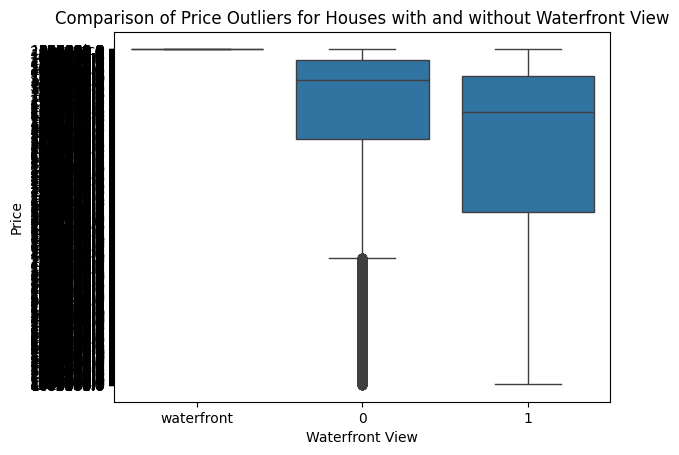

In [22]:
sns.boxplot(x=9, y=3, data=df)
plt.title('Comparison of Price Outliers for Houses with and without Waterfront View')
plt.xlabel('Waterfront View')
plt.ylabel('Price')
plt.show()


In [ ]:
sns.regplot(x=13, y=3, data=df)
plt.title('Correlation between sqft_above and Price')
plt.xlabel('sqft_above')
plt.ylabel('Price')
plt.show()

In [23]:
sns.regplot(x=13, y=3, data=df)
plt.title('Correlation between sqft_above and Price')
plt.xlabel('sqft_above')
plt.ylabel('Price')
plt.show()

AttributeError: 'int' object has no attribute 'shape'

In [ ]:
df.corr()[3].sort_values()

In [ ]:
df_without_date = df.drop(2, axis=1)
df_without_date.corr()[3].sort_values()

In [24]:
X = df[[19]]
Y = df[3]
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

ValueError: could not convert string to float: 'long'